# Clustering Analysis to Asses Impact of Elite Users

Importing Processed Data

In [50]:
import numpy as np

In [33]:
import pandas as pd
df = pd.read_csv(r'C:\Users\DELL\OneDrive - McGill University\Warut Group assignment\business_df6.csv')

In [34]:
df1 = pd.read_csv(r'C:\Users\DELL\OneDrive - McGill University\Warut Group assignment\elite_segment.csv')

In [35]:
df01 = df[['business_id' ,'stars', 'review_count','mean_stars',
       'min_stars', 'max_stars', 'count_users', 'count_reviews',]]

Merging the two datasets based on Business IDs

In [36]:
df2 = pd.merge(df01,df1,on = 'business_id')

In [37]:
df2.head(1)

,business_id,stars,review_count,mean_stars,min_stars,max_stars,count_users,count_reviews,eliteness,user_id
0,FYWN1wneV18bWNgQjJ2GNg,4.0,22,3.956522,1,5,23,23,2,5


In [38]:
df2['diff']= df2['count_reviews']-df2['eliteness']

Implementing KMeans Cluster

In [6]:
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler 


Standardizing Input

In [16]:
X = df2[['mean_stars','eliteness','review_count','min_stars','max_stars','count_users','count_reviews']]
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Comparing Silhouette Score to Identify the optimal K value of Clusters

In [17]:

withinss = []
for i in range(3,7):
    kmeans = KMeans(n_clusters = i)
    model = kmeans.fit(X_std)
    labels = model.labels_
    withinss.append(model.inertia_)
    print(i,':',silhouette_score(X_std,labels))


3 : 0.43329344918124313
4 : 0.49549784428053817
5 : 0.5199577801379855
6 : 0.5276633490301939


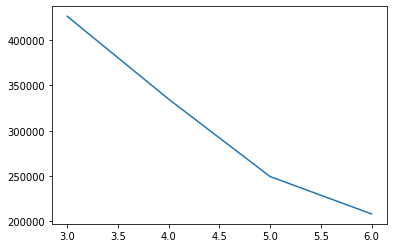

In [18]:
from matplotlib import pyplot
pyplot.plot([3,4,5,6],withinss)

Choosing 5 as the Ideal Cluster Length

In [19]:
kmeans = KMeans(n_clusters = 5)
model = kmeans.fit(X_std)
labels = model.labels_

In [20]:
from sklearn.metrics import calinski_harabasz_score
score = calinski_harabasz_score(X_std,labels)
score

49679.72517192428

In [22]:
from scipy.stats import f
df1 = 4 #k-1
df2 = 10379 #n-k
pvalue = 1-f.cdf(score,df1,df2)
pvalue

1.1102230246251565e-16

In [71]:
import numpy as np
from sklearn.metrics import silhouette_samples
silhouette = silhouette_samples(X_std,labels)
df = pd.DataFrame({'label':labels,'silhouette':silhouette})
print('Average silhouetter Score for Cluster 0:',np.average(df[df['label']==0].silhouette))
print('Average silhouetter Score for Cluster 1:',np.average(df[df['label']==1].silhouette))
print('Average silhouetter Score for Cluster 2:',np.average(df[df['label']==2].silhouette))
print('Average silhouetter Score for Cluster 3:',np.average(df[df['label']==3].silhouette))
print('Average silhouetter Score for Cluster 4:',np.average(df[df['label']==4].silhouette))

Average silhouetter Score for Cluster 0: 0.36261929241273083
Average silhouetter Score for Cluster 1: 0.6158281081155782
Average silhouetter Score for Cluster 2: 0.3062837946203738
Average silhouetter Score for Cluster 3: 0.284362481460922
Average silhouetter Score for Cluster 4: 0.526461473586776


In [47]:
means = kmeans.cluster_centers_
means

array([[-1.40026281, -0.17038571, -0.3086813 , -0.21417269, -2.74143668,
        -0.30869392, -0.30869392],
       [ 1.18151718, -0.17737451, -0.28330117,  2.08007455,  0.23379186,
        -0.2833172 , -0.2833172 ],
       [ 0.07744772, 19.19906069, 21.10645006, -0.50724338,  0.27289414,
        21.10701933, 21.10701933],
       [ 0.2861078 ,  2.41137146,  3.49801754, -0.50499522,  0.27289414,
         3.49805379,  3.49805379],
       [-0.10418734, -0.04873433, -0.04951251, -0.42173982,  0.27289414,
        -0.04950934, -0.04950934]])

Visualizing our Cluster through certain Key Aspects

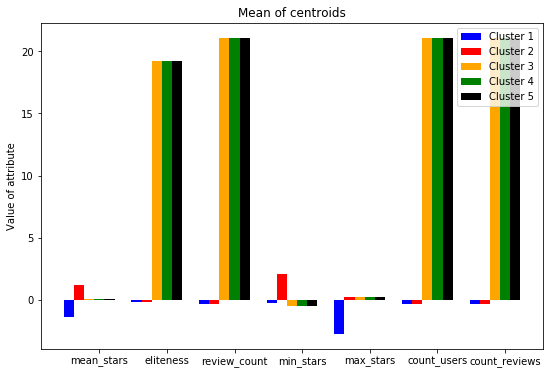

In [56]:
index = ['mean_stars','eliteness','review_count','min_stars','max_stars','count_users','count_reviews']
ind = np.arange(len(index))

pyplot.figure(figsize=(9, 6))

bar_width = 0.15
pyplot.bar(ind,means[0,:],bar_width,color = 'blue',label = 'Cluster 1')
pyplot.bar(ind+bar_width,means[1,:],bar_width,color = 'red',label = 'Cluster 2')
pyplot.bar(ind+bar_width+bar_width,means[2,:],bar_width,color = 'orange',label = 'Cluster 3')
pyplot.bar(ind+bar_width+bar_width+bar_width,means[2,:],bar_width,color = 'green',label = 'Cluster 4')
pyplot.bar(ind+bar_width+bar_width+bar_width+bar_width,means[2,:],bar_width,color = 'black',label = 'Cluster 5')


pyplot.ylabel('Value of attribute')
pyplot.xticks(ind+bar_width+bar_width+bar_width, index)
pyplot.title('Mean of centroids')
pyplot.legend(loc = 'upper right')

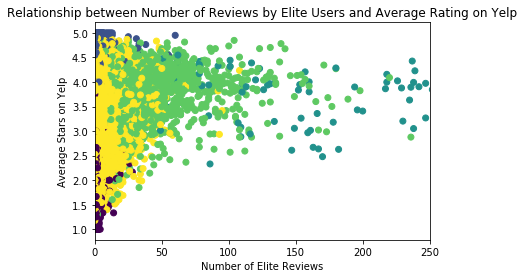

In [69]:
pyplot.scatter(X['eliteness'],X['mean_stars'],c = labels)
pyplot.xlim(0,250)
pyplot.ylabel("Average Stars on Yelp")
pyplot.xlabel("Number of Elite Reviews")
pyplot.title("Relationship between Number of Reviews by Elite Users and Average Rating on Yelp")
pyplot.show()


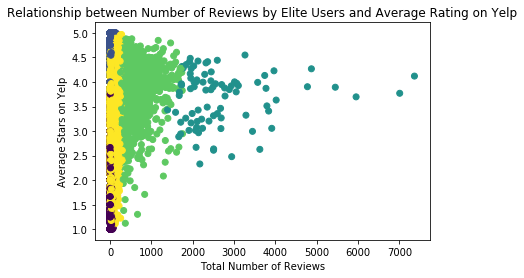

In [70]:
pyplot.scatter(X['count_reviews'],X['mean_stars'],c = labels)
pyplot.ylabel("Average Stars on Yelp")
pyplot.xlabel("Total Number of Reviews")
pyplot.title("Relationship between Number of Reviews by Elite Users and Average Rating on Yelp")
pyplot.show()
